In [1]:
#without using CNN

!pip install -U tensorflow_datasets

     |████████████████████████████████| 942kB 3.2MB/s 


In [2]:
#from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
tf.enable_eager_execution()  #enable tensorflow api to run the output immediately
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
 


W0803 04:00:24.539846 140518251538304 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



1.14.0


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
datasets,metadata = tfds.load("fashion_mnist", as_supervised=True, with_info = True)
train_dataset,test_dataset = datasets["train"],datasets["test"]

W0803 04:00:59.618331 140518251538304 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [5]:
num_train_dataset = metadata.splits['train'].num_examples



num_test_dataset = metadata.splits['test'].num_examples

num_train_dataset,num_test_dataset

(60000, 10000)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
#can't do this as training data consist of images and labesls both
#train_dataset.images = np.array(train_dataset.images) 
#Scaler = MinMaxScaler(feature_range=(0, 1))
#Scaler_train_datasets = Scaler.fit_transform(train_datasets.images)

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)


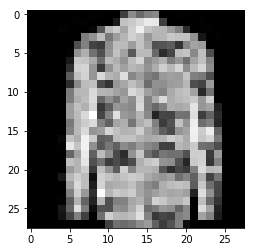

In [9]:
for image,label in train_dataset.take(1):               # take(1) takes one image
  break

image = image.numpy().reshape(28,28)

plt.imshow(image,cmap = "gray")



In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_dataset).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs = 5, steps_per_epoch= math.ceil(num_train_dataset/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4948 - acc: 0.8268
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3679 - acc: 0.8672
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3341 - acc: 0.8784
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3091 - acc: 0.8849
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2909 - acc: 0.8933


In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_dataset/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3349 - acc: 0.8807
Accuracy on test dataset: 0.8807


In [0]:
for test_images,test_labels in test_dataset.take(1):          #here we take a batch of 32 images by take(2)
  test_images = test_images.numpy()                           #for prediction images are coverted into array then prediction 
  test_labels = test_labels.numpy()                           #is made in batches i.e 32 in size
  predictions = model.predict(test_images)

In [16]:
predictions.shape

(32, 10)

In [20]:
for i,c in enumerate(predictions):
  print(np.argmax(c),"|| type :{}".format(class_names[np.argmax(c)]))
                                                          

6 || type :Shirt
3 || type :Dress
6 || type :Shirt
5 || type :Sandal
2 || type :Pullover
5 || type :Sandal
9 || type :Ankle boot
5 || type :Sandal
6 || type :Shirt
3 || type :Dress
8 || type :Bag
1 || type :Trouser
0 || type :T-shirt/top
3 || type :Dress
5 || type :Sandal
6 || type :Shirt
7 || type :Sneaker
2 || type :Pullover
9 || type :Ankle boot
8 || type :Bag
4 || type :Coat
0 || type :T-shirt/top
8 || type :Bag
6 || type :Shirt
8 || type :Bag
8 || type :Bag
1 || type :Trouser
5 || type :Sandal
7 || type :Sneaker
4 || type :Coat
2 || type :Pullover
4 || type :Coat
